In [37]:
import numpy as np
import pandas as pd
import scipy.signal as signal

In [107]:
data = pd.read_csv('../Data/0507-1616-S-da.csv',sep=';')
data.head()

,21678,869501,Unnamed: 2
0,28029,1707717,NaN
1,28021,1711105,NaN
2,28027,1711114,NaN
3,28026,1711134,NaN
4,28026,1711145,NaN


In [108]:
# Take second column (relevant)
x = data[data.columns[1]].to_numpy()
# Cut of the start of the measurement 
x = x[5:-1]      
# normalize to zero mean               
x = x - np.mean(x)

In [109]:
# CONSTANTS
order = 5 
sampling_freq = 100
cutoff_freq_up = 4
cutoff_freq_down = 0.5
number_of_samples = x.shape[0]

time=np.linspace(0, (1/sampling_freq)*number_of_samples, num=number_of_samples, endpoint=False)


In [110]:
# Discrete filter, bandpass filter 
def filter_signal(x, upper_cutoff_frequency, low_cutoff_frequency):
    normalized_cutoff_freq = 2 * cutoff_freq_up / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='low')
    #Filtrado
    filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, x)

    normalized_cutoff_freq = 2 * cutoff_freq_down / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='high')
    #Filtrado
    filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, filtered_signal_x)
    return filtered_signal_x

filtered_signal_x = filter_signal(x,cutoff_freq_up,cutoff_freq_down)


In [111]:
from scipy.fft import fft,fftfreq

period = 1/sampling_freq
xf = fftfreq(number_of_samples, period)[:number_of_samples//2]

def get_spectrum(filtered_signal):
    signal_fourier = fft(filtered_signal)
    xf = fftfreq(number_of_samples, period)[:number_of_samples//2]
    return 2.0/number_of_samples * np.abs(signal_fourier[0:number_of_samples//2])

def get_max_frequency(filtered_signal):
    return xf[np.argmax(get_spectrum(filtered_signal))]

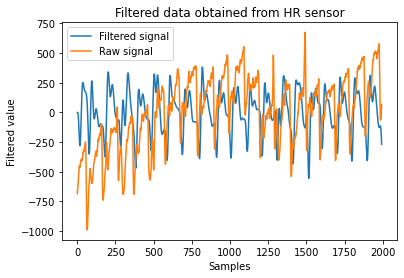

In [112]:
import matplotlib.pyplot as plt
plt.plot(filtered_signal_x)
plt.plot(x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Samples')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

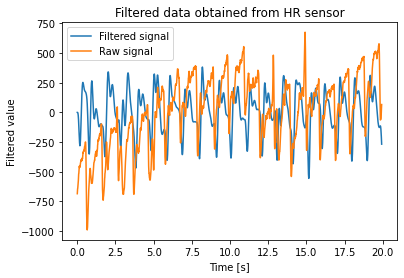

In [113]:
plt.plot(time,filtered_signal_x)
plt.plot(time,x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Time [s]')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

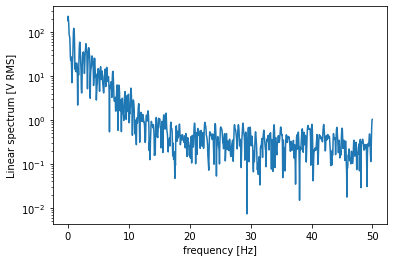

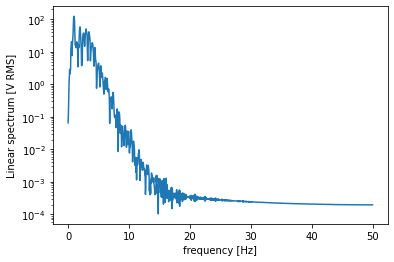

In [114]:
f, Pxx_spec = signal.periodogram(x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
f, Pxx_spec = signal.periodogram(filtered_signal_x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

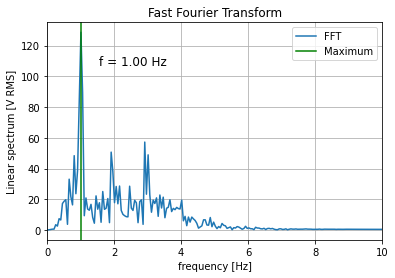

In [115]:
fig, ax = plt.subplots()

spectrum = get_spectrum(filtered_signal_x)

plt.plot(xf, spectrum)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Fast Fourier Transform')
max_freq = xf[np.argmax(spectrum)]
plt.axvline(max_freq, color='green') # cutoff frequency
plt.xlim(0,10)
plt.legend(['FFT','Maximum'])
ax.annotate('f = %.2f Hz'%max_freq,
            xy=(.25, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
plt.grid()
plt.show()

In [116]:
freq = xf[np.argmax(spectrum)]
freq


1.0035122930255898

In [117]:
bpm = freq*60

In [118]:
bpm

60.21073758153538

Execution time: 1.3872928619384766


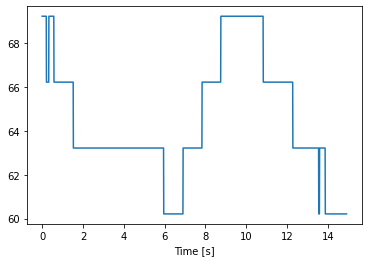

In [54]:
from scipy.fft import fft,fftfreq

frequencies = []
window_width=500

import time as timer
start = timer.time()

for i in range(number_of_samples-w):
    window = np.zeros(number_of_samples)
    window[i:i+w] = 1        
    windowed = filtered_signal_x*window
    
    windowed = filter_signal(windowed, 4, 0.7)

    frequencies.append(get_max_frequency(windowed))
    
plt.plot(time[0:len(frequencies)], [f*60 for f in frequencies])
plt.xlabel('Time [s]')

end = timer.time()
print("Execution time:", end - start)


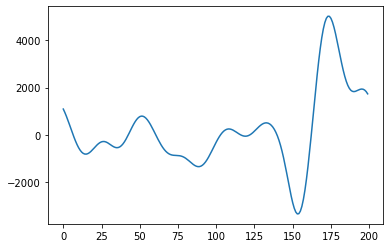

In [ ]:
plt.plot(filtered_signal_x[300:500])

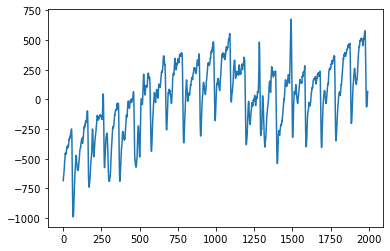

In [119]:
plt.plot(x)